In [1]:
import pandas as pd
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/Tweets.csv')

In [4]:
df.drop(columns='tweet_id',inplace=True)

In [5]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,24-02-2015 11:35,NaN,Eastern Time (US & Canada)
1,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
2,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,24-02-2015 11:15,Lets Play,Central Time (US & Canada)
3,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,24-02-2015 11:15,NaN,Pacific Time (US & Canada)
4,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,24-02-2015 11:14,NaN,Pacific Time (US & Canada)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   airline_sentiment             14640 non-null  object 
 1   airline_sentiment_confidence  14640 non-null  float64
 2   negativereason                9178 non-null   object 
 3   negativereason_confidence     10522 non-null  float64
 4   airline                       14640 non-null  object 
 5   airline_sentiment_gold        40 non-null     object 
 6   name                          14640 non-null  object 
 7   negativereason_gold           32 non-null     object 
 8   retweet_count                 14640 non-null  int64  
 9   text                          14640 non-null  object 
 10  tweet_coord                   1019 non-null   object 
 11  tweet_created                 14640 non-null  object 
 12  tweet_location                9907 non-null   object 
 13  u

In [7]:
df.drop(['negativereason_confidence','airline_sentiment_gold' ,'negativereason_gold','tweet_location','name','user_timezone','tweet_coord'],axis=1,inplace=True)                        

In [8]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,retweet_count,text,tweet_created
0,neutral,1.0000,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,24-02-2015 11:35
1,positive,0.3486,NaN,Virgin America,0,@VirginAmerica plus you've added commercials t...,24-02-2015 11:15
2,neutral,0.6837,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,24-02-2015 11:15
3,negative,1.0000,Bad Flight,Virgin America,0,@VirginAmerica it's really aggressive to blast...,24-02-2015 11:15
4,negative,1.0000,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing...,24-02-2015 11:14


In [9]:
# Data Analysis:

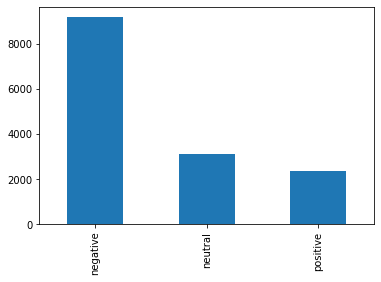

In [10]:
df['airline_sentiment'].value_counts().plot(kind='bar')

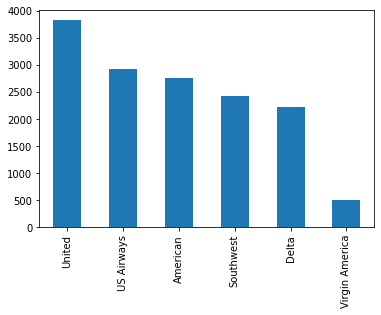

In [11]:
df['airline'].value_counts().plot(kind='bar')

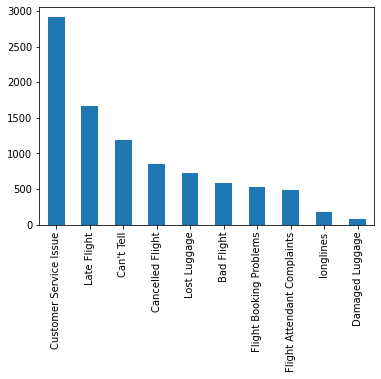

In [12]:
# Q3: Whar are the some of the common negative feedbacks given
df['negativereason'].value_counts().plot(kind='bar')

In [13]:
# Q5Could you generate the no. of sentiments of each airline from the dataset

In [14]:
df1=pd.crosstab(df['airline'],df['airline_sentiment'])

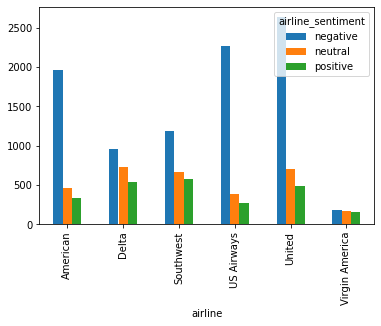

In [15]:
df1.plot(kind='bar')

In [16]:
# Q Is there a specific day where a lot of negative feedback was given.

In [17]:
df['tweet_created']=pd.to_datetime(df['tweet_created']).dt.strftime('%d-%m-%Y')

In [18]:
df2=pd.crosstab(df['tweet_created'],df['airline_sentiment'])

In [19]:
df2.style.highlight_max(color='red')

airline_sentiment,negative,neutral,positive
tweet_created,,,
16-02-2015,3,1,0
17-02-2015,838,297,273
18-02-2015,736,335,273
19-02-2015,751,329,296
20-02-2015,835,383,282
21-02-2015,1049,278,230
22-02-2015,2266,463,350
23-02-2015,1919,676,433
24-02-2015,781,337,226


In [20]:
# DATA CLEANING

In [21]:
df.head()

,airline_sentiment,airline_sentiment_confidence,negativereason,airline,retweet_count,text,tweet_created
0,neutral,1.0000,NaN,Virgin America,0,@VirginAmerica What @dhepburn said.,24-02-2015
1,positive,0.3486,NaN,Virgin America,0,@VirginAmerica plus you've added commercials t...,24-02-2015
2,neutral,0.6837,NaN,Virgin America,0,@VirginAmerica I didn't today... Must mean I n...,24-02-2015
3,negative,1.0000,Bad Flight,Virgin America,0,@VirginAmerica it's really aggressive to blast...,24-02-2015
4,negative,1.0000,Can't Tell,Virgin America,0,@VirginAmerica and it's a really big bad thing...,24-02-2015


In [22]:
df.drop(columns=['airline_sentiment_confidence','negativereason','airline','retweet_count','tweet_created'],inplace=True)

In [23]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [24]:
# Cleaning the text column

In [25]:
stops=stopwords.words('english')

In [26]:
# len(stops)

In [27]:
def data_cleaner(sentence):
  sentence=re.sub("[^A-Za-z]"," ",sentence)
  words=sentence.lower()
  words=words.split()
  important_words=[w for w in words if w not in stops]
  return (' '.join(important_words))

In [28]:
sent='Vikas is learning deep learning @ 8 $9.30 its fun I am enjoying'

In [29]:
data_cleaner(sent)

'vikas learning deep learning fun enjoying'

In [30]:
df['clean_text']=df['text'].apply(lambda x: data_cleaner(x))

In [31]:
df.head()

,airline_sentiment,text,clean_text
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercials experienc...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


In [32]:
df.drop('text',axis=1,inplace=True)

In [33]:
df.head()

,airline_sentiment,clean_text
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plus added commercials experienc...
2,neutral,virginamerica today must mean need take anothe...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


In [34]:
df_new=pd.get_dummies(df['airline_sentiment'],columns=['neutral','positive','negative'])

In [35]:
df_new

,negative,neutral,positive
0,0,1,0
1,0,0,1
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
14635,0,0,1
14636,1,0,0
14637,0,1,0
14638,1,0,0


In [36]:
df_new1=df_new.join(df['clean_text'])

In [37]:
df_new1.head()

,negative,neutral,positive,clean_text
0,0,1,0,virginamerica dhepburn said
1,0,0,1,virginamerica plus added commercials experienc...
2,0,1,0,virginamerica today must mean need take anothe...
3,1,0,0,virginamerica really aggressive blast obnoxiou...
4,1,0,0,virginamerica really big bad thing


In [38]:
x=df_new1['clean_text']
y=df_new1[['negative','neutral','positive']]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [40]:
x_train.shape

(11712,)

In [41]:
y_train.shape

(11712, 3)

In [42]:
tf=TfidfVectorizer()

In [43]:
# Always fit_transform your train data and transform your test data
x_train_tf=tf.fit_transform(x_train)
x_test_tf=tf.transform(x_test)

In [44]:
len(tf.get_feature_names())

11919

In [45]:
x_test_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
x_train_tf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
x_train_tf=scipy.sparse.csr_matrix.todense(x_train_tf)

In [48]:
x_test_tf=scipy.sparse.csr_matrix.todense(x_test_tf)

In [49]:
x_train_tf

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

#Model Building

In [50]:
x_train_tf.shape

(11712, 11919)

In [51]:
x_input=11919
x_neuron=11712
y_ouput=3

In [52]:
model=Sequential([Dense(x_neuron,activation='relu',input_shape=(x_input,)),
                  Dense(64,activation='relu'),
                  Dense(y_ouput,activation='softmax')                  
                  ])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11712)             139607040 
_________________________________________________________________
dense_1 (Dense)              (None, 64)                749632    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 140,356,867
Trainable params: 140,356,867
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [55]:
history=model.fit(x_train_tf,y_train,batch_size=1000,epochs=3,validation_data=(x_test_tf,y_test))

Epoch 1/3
12/12 [==============================] - 133s 11s/step - loss: 0.8734 - accuracy: 0.5875 - val_loss: 0.6966 - val_accuracy: 0.6510
Epoch 2/3
12/12 [==============================] - 129s 11s/step - loss: 0.5799 - accuracy: 0.6794 - val_loss: 0.5922 - val_accuracy: 0.7380
Epoch 3/3
12/12 [==============================] - 128s 11s/step - loss: 0.3996 - accuracy: 0.8553 - val_loss: 0.6059 - val_accuracy: 0.7828


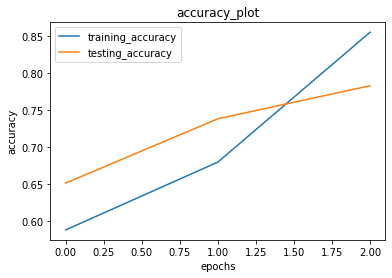

In [58]:
# Accuracy Score plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('accuracy_plot')
plt.legend(['training_accuracy','testing_accuracy'])

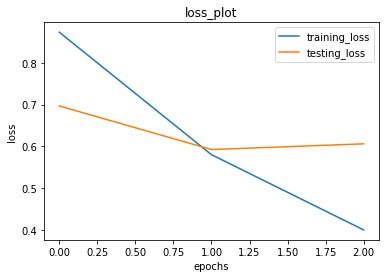

In [59]:
# Loss Plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss_plot')
plt.legend(['training_loss','testing_loss'])
